In [1]:
import torch
import matplotlib.pyplot as plt



class Linear(torch.nn.Module):
    def __init__(self, w0, w1, b):
        super().__init__()
        w = torch.tensor([[w0],[w1]])
        b = torch.tensor(b)
        self.w = torch.nn.Parameter(w, requires_grad=True)
        self.b = torch.nn.Parameter(b, requires_grad=True)
        
    def forward(self, x):        
        # return self.w.T @ x + self.b
        # x: *, 2, 1
        # w: 2, 1
        return self.w.T @ x  + self.b 

def mean_squared_error(y_hat, y):
    return torch.mean((y_hat - y)**2)


def relu(y_hat):
    return torch.max(torch.zeros_like(y_hat), y_hat)

def get_deriv_loss_over_error(error):
    return 2 * error

def get_deriv_error_over_output(y_hat):
    return torch.ones_like(y_hat)



In [6]:

# Eg. 1.1


x = torch.tensor([[0.5], [0.7]])        # 2, 1
y = torch.tensor([[0.1]])               # 1, 1
layer0_0 = Linear(0.4, -0.7, 0.1)
y_hat = layer0_0.forward(x)             # 1, 1
loss = mean_squared_error(y_hat, y)
loss.backward()

print(y_hat)

def get_deriv_loss_over_error(error):
    return 2 * error

def get_deriv_error_over_output(y_hat):
    return torch.ones_like(y_hat)

def get_deriv_y_hat_over_w0(x):
    return x[0:1]

error = y_hat - y
print(error)
output = y_hat
deriv_loss_over_error = get_deriv_loss_over_error(error)
deriv_error_over_y_hat = get_deriv_error_over_output(output)
deriv_y_hat_over_w0 = get_deriv_y_hat_over_w0(x)
gradient_w0 = deriv_loss_over_error * deriv_error_over_y_hat * deriv_y_hat_over_w0

ans = layer0_0.w.grad.data[0:1]

print("PyTorch Autograd:", ans)
print("Manual computation:", gradient_w0)

assert torch.allclose(gradient_w0.data, ans), "Your answer is incorrect. Try again :)"
print("Successful!")

tensor([[-0.1900]], grad_fn=<AddBackward0>)
tensor([[-0.2900]], grad_fn=<SubBackward0>)
PyTorch Autograd: tensor([[-0.2900]])
Manual computation: tensor([[-0.2900]], grad_fn=<MulBackward0>)
Successful!


In [4]:

#Ex. 1.2:
def get_deriv_y_hat_over_w1(x):
    return x[1:2]
    
deriv_y_hat_over_w1 = get_deriv_y_hat_over_w1(x)
gradient_w1 = deriv_loss_over_error * deriv_error_over_y_hat * deriv_y_hat_over_w1

ans = layer0_0.w.grad.data[1:2]
print("PyTorch Autograd:", ans)
print("Manual computation:", gradient_w1)
assert torch.allclose(gradient_w1.data, ans), "Your answer is incorrect. Try again :)"
print("Successful!")

PyTorch Autograd: tensor([[-0.4060]])
Manual computation: tensor([[-0.4060]], grad_fn=<MulBackward0>)
Successful!


In [10]:
#Ex. 1.3:
def get_deriv_y_hat_over_b(x):
    return torch.ones_like(x)[0:1]


error = y_hat - y
output = y_hat


gradient_b = deriv_loss_over_error * deriv_error_over_y_hat * get_deriv_y_hat_over_b(x)

ans = layer0_0.b.grad.data
print("PyTorch Autograd:", ans)
print("Manual computation:", gradient_b)
assert torch.allclose(gradient_b.data, ans), "Your answer is incorrect. Try again :)"
print("Successful!")





PyTorch Autograd: tensor(-0.5800)
Manual computation: tensor([[-0.5800]], grad_fn=<MulBackward0>)
Successful!


tensor([[0.]], grad_fn=<MaximumBackward0>)
tensor([[-0.1900]], grad_fn=<AddBackward0>)
tensor([[1.]])
tensor([[-0.2000]], grad_fn=<MulBackward0>)
tensor([[False]])
tensor([[0.5000]])
PyTorch Autograd: tensor([[0.]])
Manual computation: tensor([[-0.]], grad_fn=<MulBackward0>)
Successful!


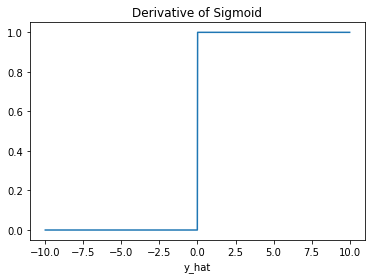

In [20]:
#Ex. 1.4
def relu(y_hat):
    return torch.max(torch.zeros_like(y_hat), y_hat) #max(0, y_hat)

x = torch.tensor([[0.5], [0.7]])        # 2, 1
y = torch.tensor([[0.1]])               # 1, 1

layer0_0 = Linear(0.4, -0.7, 0.1)
y_hat = layer0_0.forward(x)             # 1, 1
z = relu(y_hat)
loss = mean_squared_error(z, y)
loss.backward()

def get_deriv_relu(y_hat):
    return y_hat > 0 

error = z-y
output = z


def get_deriv_y_hat_over_w0(x):
    return x[0:1]

def get_deriv_error_over_z(output):
    return torch.ones_like(output)

def get_deriv_z_over_y_hat(y_hat):
    return get_deriv_relu(y_hat)

deriv_error_over_z = get_deriv_error_over_z(output)
deriv_y_hat_over_w0 = get_deriv_y_hat_over_w0(x)
deriv_z_over_y_hat = get_deriv_z_over_y_hat(y_hat)


print(output)
print(y_hat)
print(deriv_error_over_z)

# Compute the derivative of the loss with respect to the error
deriv_loss_over_error = 2 * error
print(deriv_loss_over_error)
print(deriv_z_over_y_hat)
print(deriv_y_hat_over_w0)

gradient_w0 = deriv_loss_over_error * deriv_error_over_z * deriv_z_over_y_hat * deriv_y_hat_over_w0

print("PyTorch Autograd:", layer0_0.w.grad.data[0:1])
print("Manual computation:", gradient_w0)

assert torch.allclose(gradient_w0.data,layer0_0.w.grad.data[0:1]),"Your answer is incorrect. Try again :)"
print("Successful!")

xaxis = torch.linspace(-10, 10, steps=1000)
plt.plot(xaxis, get_deriv_relu(xaxis))
plt.title("Derivative of Sigmoid")
plt.xlabel("y_hat")
plt.show()

tensor([[0.7053]], grad_fn=<MulBackward0>)
tensor([[False]])
tensor([[0.5000]])
tensor([[0.2478]], grad_fn=<DivBackward0>)
PyTorch Autograd: tensor([[0.0874]])
Manual computation: tensor([[0.0874]], grad_fn=<MulBackward0>)
Successful!


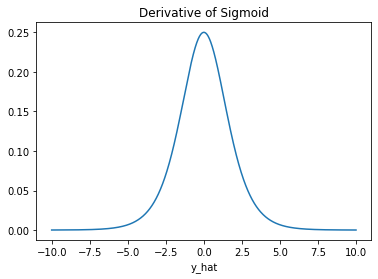

In [27]:
# Ex. 1.4.1 (optional):

def sigmoid(y_hat):
    return 1 / (1+torch.exp(-1 * y_hat))

layer0_0 = Linear(0.4, -0.7, 0.1)
y_hat = layer0_0.forward(x)             # 1, 1
z = sigmoid(y_hat)
loss = mean_squared_error(z, y)
loss.backward()

def get_deriv_sigmoid(y_hat):
    return torch.exp(-y_hat) / (1 + torch.exp(-y_hat))**2
    #return z * (1-z)

error = z-y
output = z

deriv_sigmoid = get_deriv_sigmoid(y_hat)
deriv_loss_over_error = 2 * error
deriv_error_over_z = get_deriv_error_over_z(output)
deriv_y_hat_over_w0 = get_deriv_y_hat_over_w0(x)

gradient_w0 = deriv_loss_over_error * deriv_error_over_z * deriv_sigmoid * deriv_y_hat_over_w0

print(deriv_loss_over_error)
print(deriv_z_over_y_hat)
print(deriv_y_hat_over_w0)
print(deriv_sigmoid)


print("PyTorch Autograd:", layer0_0.w.grad.data[0:1])
print("Manual computation:", gradient_w0)

assert torch.allclose(gradient_w0.data, layer0_0.w.grad.data[0:1])
print("Successful!")


xaxis = torch.linspace(-10, 10, steps=1000)
plt.plot(xaxis, get_deriv_sigmoid(xaxis))
plt.title("Derivative of Sigmoid")
plt.xlabel("y_hat")
plt.show()


In [28]:

#Eg. 1.5: 

class TwoLayerNN(torch.nn.Module):

    def __init__(self):
        super().__init__()
        self.layer0_0 = Linear(0.8, -0.5, 0.5)
        self.layer0_1 = Linear(-0.3, -0.1, -0.2)
        self.layer1 = Linear(-0.5, -0.4, -0.8)
    def forward(self, x):

        # x: *, 2, 1
        y_hat0_l0 = self.layer0_0.forward(x) 
        y_hat1_l0 = self.layer0_1.forward(x) 

        # y_hat0_0: *, 1, 1
        # y_hat0_1: *, 1, 1
        z_0 = relu(y_hat0_l0) 
        z_1 = relu(y_hat1_l0)

        # z_0: *, 1, 1
        # z_1: *, 1, 1
        
        z = torch.cat([z_0, z_1], dim=-2)
        
        # z: *, 2, 1
        # print(z.shape)
        y_hat = self.layer1.forward(z)

        return y_hat, y_hat0_l0, y_hat1_l0

x = torch.tensor([[-0.5], [-0.7]])        # 2, 1
y = torch.tensor([[-0.1]])               # 1, 1
model = TwoLayerNN()
y_hat, y_hat0_l0, y_hat1_l0 = model.forward(x)             # 1, 1
loss = mean_squared_error(y_hat, y)
loss.backward()

# x = torch.tensor([[0.5], [0.7]])        # 2, 1
# y = torch.tensor([[0.1]])               # 1, 1


def get_deriv_y_hat_over_z0(w):
    return w[0:1]

def get_deriv_relu(x):
    return x>0

error = y_hat-y
output = y_hat
deriv_loss_over_error = get_deriv_loss_over_error(error)
deriv_error_over_output = get_deriv_error_over_output(output)
deriv_y_hat_over_z0 = get_deriv_y_hat_over_z0(model.layer1.w)
deriv_z0_over_y_hat0_l0 = get_deriv_relu(y_hat0_l0)
deriv_y_hat0_l0_over_w0_0_l0 = get_deriv_y_hat_over_w0(x) 


# deriv_z_over_y_hat = get_deriv_relu(y_hat)
gradient_w_0_0_l0 = deriv_loss_over_error * deriv_error_over_output * deriv_y_hat_over_z0 \
    * deriv_z0_over_y_hat0_l0 * deriv_y_hat0_l0_over_w0_0_l0


print("PyTorch Autograd:", model.layer0_0.w.grad.data[0:1])
print("Manual computation:", gradient_w_0_0_l0)

assert torch.allclose(gradient_w_0_0_l0.data, model.layer0_0.w.grad.data[0:1])
print("Successful!")




PyTorch Autograd: tensor([[-0.4665]])
Manual computation: tensor([[-0.4665]], grad_fn=<MulBackward0>)
Successful!


In [31]:
# Ex. 1.6:

def get_deriv_y_hat_over_z1(w):
    return w[1:2]


derive_y_hat1_l0_over_w0_0_l1 = get_deriv_y_hat_over_w0(x) #y_hat1_l0_over_w0_0_l1
deriv_z1_over_y_hat1_l0 = get_deriv_relu(y_hat1_l0)
deriv_y_hat_over_z1 = get_deriv_y_hat_over_z1(model.layer1.w)
deriv_error_over_output = get_deriv_error_over_output(output)
deriv_loss_over_error = get_deriv_loss_over_error(error)

gradient_w_0_1_l0 = deriv_loss_over_error * deriv_error_over_output * deriv_y_hat_over_z1 \
    * deriv_z1_over_y_hat1_l0 * derive_y_hat1_l0_over_w0_0_l1

ans = model.layer0_1.w.grad.data[0:1]
print("PyTorch Autograd:", ans)
print("Manual computation:", gradient_w_0_1_l0)

assert torch.allclose(gradient_w_0_1_l0.data, ans)
print("Successful!")


PyTorch Autograd: tensor([[-0.3732]])
Manual computation: tensor([[-0.3732]], grad_fn=<MulBackward0>)
Successful!
